<a href="https://colab.research.google.com/github/jazzlynamelia/Rakamin-PBI-IDX-Data-Scientist/blob/main/Rakamin_FinalTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Import Libraries & Load Data

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Data Understanding & Exploratory Data Analysis (EDA)

In [ ]:
# Load data
df = pd.read_csv('loan_data_2007_2014 (1).csv', low_memory=False)
print("Data berhasil dimuat.\n")

Data berhasil dimuat.



## A. Inspeksi Data Awal

In [ ]:
# Melihat 5 baris pertama data untuk mendapatkan gambaran umum
print("Lima baris pertama:")
display(df.head())

Lima baris pertama:


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Melihat ringkasan informasi
print("Ringkasan informasi:")
df.info()

Ringkasan informasi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 n

In [ ]:
# Melihat statistik deskriptif untuk kolom numerik
print("Statistik deskriptif:")
display(df.describe())

Statistik deskriptif:


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [ ]:
# Cek jumlah baris dan kolom
print("Ukuran dataset:")
print(f"Baris: {df.shape[0]}")
print(f"Kolom: {df.shape[1]}")

Ukuran dataset:
Baris: 466285
Kolom: 75


In [ ]:
# Cek & hitung nilai kosong (null) di setiap kolom
print("Jumlah nilai kosong (null) per kolom:")
null_counts = df.isnull().sum().sort_values(ascending=False).reset_index()
null_counts.columns = ['Kolom', 'Jumlah Null']
display(null_counts)

Jumlah nilai kosong (null) per kolom:


,Kolom,Jumlah Null
0,max_bal_bc,466285
1,open_rv_24m,466285
2,inq_fi,466285
3,open_rv_12m,466285
4,il_util,466285
...,...,...
70,application_type,0
71,collection_recovery_fee,0
72,recoveries,0
73,total_rec_late_fee,0


In [ ]:
# Menghitung dan menampilkan jumlah baris duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat dalam dataset: {jumlah_duplikat}")

Jumlah baris duplikat dalam dataset: 0


## B. Menentukan Target Variabel

In [ ]:
# Lihat isi unik dari kolom 'loan_status' untuk memahami nilainya
print("Nilai unik di kolom 'loan_status':")
print(df['loan_status'].unique())

Nilai unik di kolom 'loan_status':
['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


In [ ]:
# Membuat kolom target 'credit_risk'
# 1 untuk pinjaman buruk ('Charged Off')
# 0 untuk pinjaman baik (semua status lainnya, yang nanti akan difilter)

df['credit_risk'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [ ]:
# Filter dataset untuk hanya menyertakan pinjaman yang sudah selesai
# ('Fully Paid' -> Baik, 'Charged Off' -> Buruk)

df_filtered = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

print(f"Ukuran dataset setelah memfilter 'loan_status': {df_filtered.shape}")
print("Kolom 'credit_risk' berhasil dibuat.\n")

Ukuran dataset setelah memfilter 'loan_status': (227214, 76)
Kolom 'credit_risk' berhasil dibuat.



## C. Analisis & Visualisasi Data (EDA)

Plot Distribusi Risiko Kredit:


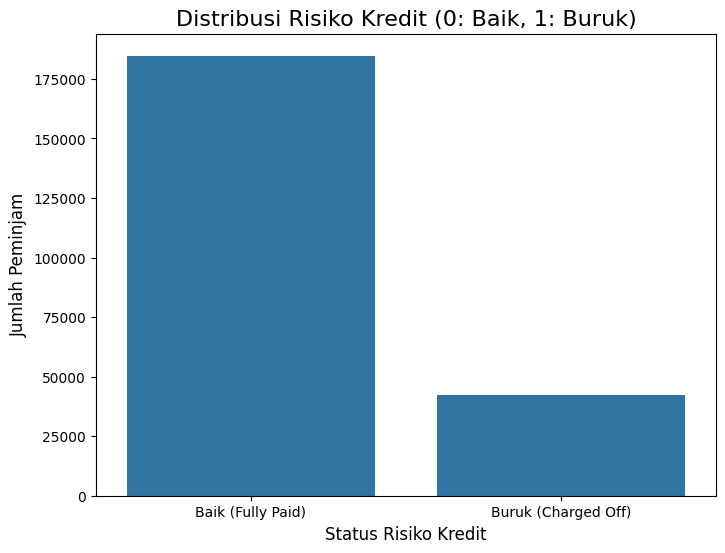

In [ ]:
# Analisis Target: Distribusi Risiko Kredit

print("Plot Distribusi Risiko Kredit:")
plt.figure(figsize=(8, 6))
sns.countplot(x='credit_risk', data=df_filtered)
plt.title('Distribusi Risiko Kredit (0: Baik, 1: Buruk)', fontsize=16)
plt.xlabel('Status Risiko Kredit', fontsize=12)
plt.ylabel('Jumlah Peminjam', fontsize=12)
plt.xticks([0, 1], ['Baik (Fully Paid)', 'Buruk (Charged Off)'])
plt.show()

**Insight:**

Terlihat bahwa jumlah pinjaman 'Baik' jauh lebih banyak daripada pinjaman 'Buruk'. Hal ini mengindikasikan *imbalanced dataset*.

Plot Distribusi Jumlah Pinjaman:


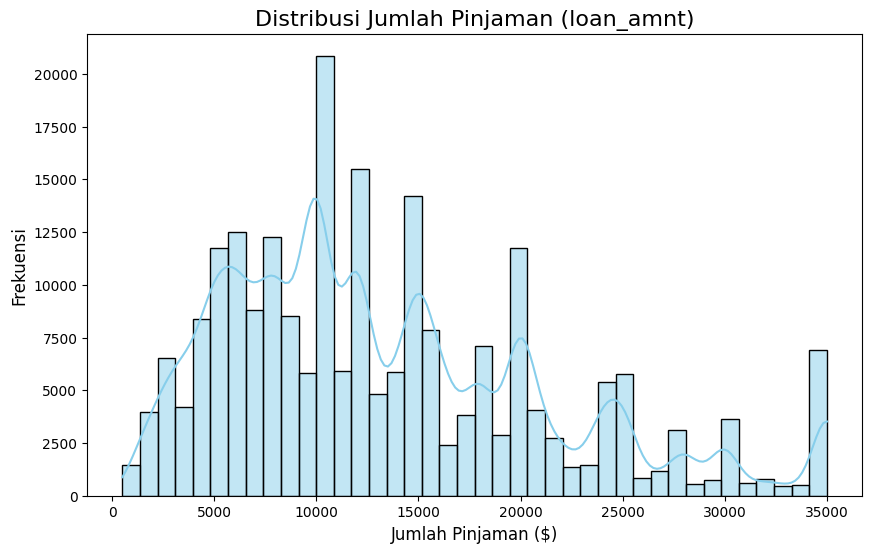

In [ ]:
# Analisis Fitur Numerik: Distribusi Jumlah Pinjaman

print("Plot Distribusi Jumlah Pinjaman:")
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['loan_amnt'], kde=True, bins=40, color='skyblue')
plt.title('Distribusi Jumlah Pinjaman (loan_amnt)', fontsize=16)
plt.xlabel('Jumlah Pinjaman ($)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

**Insight:**

Banyak pinjaman terkonsentrasi di angka bulat seperti `$5,000`, `$10,000`, dan `$15,000`


Plot Distribusi Tujuan Pinjaman:


/tmp/ipython-input-1239520160.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='purpose', data=df_filtered, order = df_filtered['purpose'].value_counts().index, palette='plasma')


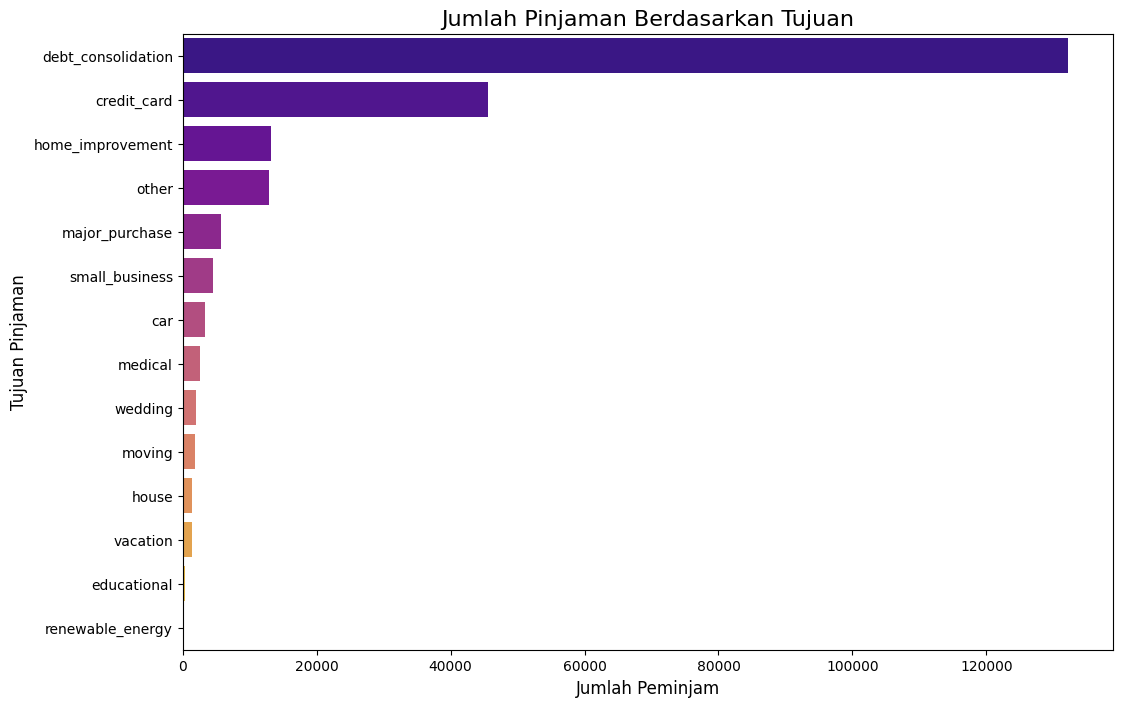

Insight: Tujuan pinjaman yang paling umum adalah 'debt_consolidation' (konsolidasi utang), diikuti oleh 'credit_card'.



In [ ]:
# Analisis Fitur Kategorikal: Distribusi Tujuan Pinjaman (purpose)

print("Plot Distribusi Tujuan Pinjaman:")

plt.figure(figsize=(12, 8))
sns.countplot(y='purpose', data=df_filtered, order = df_filtered['purpose'].value_counts().index, palette='plasma')
plt.title('Jumlah Pinjaman Berdasarkan Tujuan', fontsize=16)
plt.xlabel('Jumlah Peminjam', fontsize=12)
plt.ylabel('Tujuan Pinjaman', fontsize=12)
plt.show()

print("Insight: Tujuan pinjaman yang paling umum adalah 'debt_consolidation' (konsolidasi utang), diikuti oleh 'credit_card'.\n")

**Insight:**


*   Tujuan pinjaman yang paling dominan adalah 'debt_consolidation' (menggabungkan utang-utang lain menjadi satu pinjaman), diikuti oleh pinjaman untuk 'credit_card'.
*   Tujuan pinjaman bisa menjadi fitur yang sangat penting untuk memprediksi risiko gagal bayar.

Heatmap Korelasi Fitur Numerik:


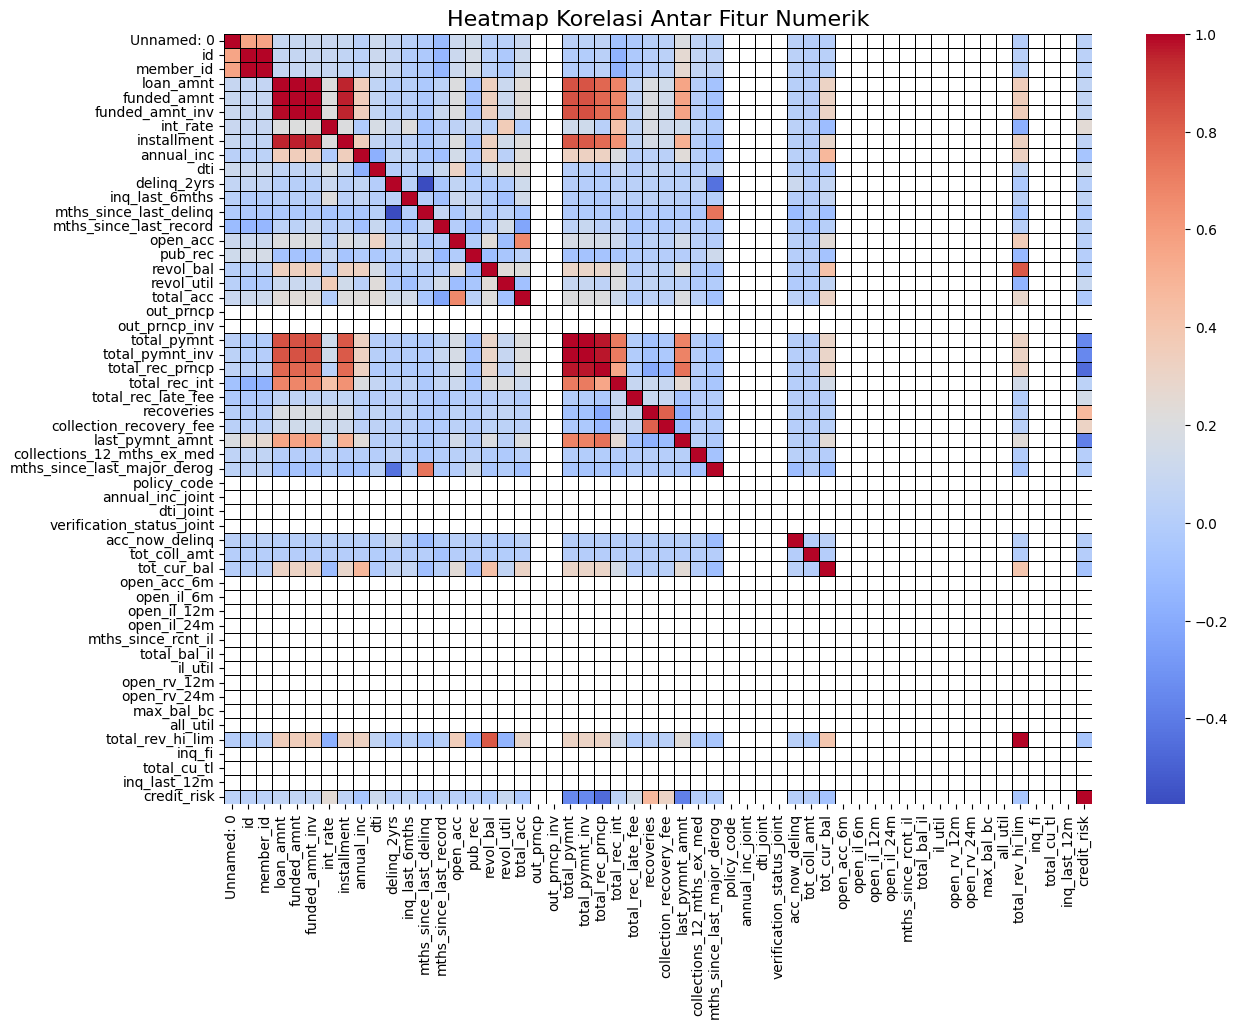

In [ ]:
# Analisis Korelasi antar Fitur Numerik
print("Heatmap Korelasi Fitur Numerik:")
# Memilih hanya kolom numerik untuk korelasi
numeric_cols = df_filtered.select_dtypes(include=np.number)

plt.figure(figsize=(14, 10))
sns.heatmap(
    numeric_cols.corr(),
    cmap='coolwarm',
    annot=False,
    linewidths=0.5,
    linecolor='black'
)
plt.title('Heatmap Korelasi Antar Fitur Numerik', fontsize=16)
plt.show()

**Insight:**

---

**Hubungan Fitur dengan Target (credit_risk)**

1. Korelasi Positif (Meningkatkan Risiko):
    *   `recoveries`

          Didefinisikan sebagai "rencana pembayaran lanjutan bagi yang kesulitan membayar" . Fitur ini mengakibatkan **kebocoran data sehingga harus dihapus** karena seharusnya tidak tersedia saat peminjam pertama kali mengajukan pinjaman.
    *   `collection_recovery_fee`

          Didefinisikan sebagai biaya "post charge off". Fitur ini mengakibatkan **kebocoran data sehingga harus dihapus** karena biaya ini hanya ada setelah pinjaman dipastikan gagal bayar.
    *   `int_rate`
          
          Didefinisikan sebagai "suku bunga". Fitur ini adalah **prediktor yang valid** karena karena pemberi pinjaman menetapkan bunga lebih tinggi untuk kompensasi risiko pada peminjam yang dinilai kurang aman.

2. Korelasi Negatif (Menurunkan Risiko):

      *   `total_rec_prncp`

          Mengidentifikasikan "pokok pinjaman yang sudah dibayar lunas". **Prediktor terbaik** untuk pinjaman yang sehat karena semakin besar pokok pinjaman yang sudah lunas, semakin kecil kemungkinan pinajaman akan gagal.
      *   `total_pymnt`, `total_pymnt_inv`, `last_pymnt_amnt`
      
          Mengidentifikasikan "histori pembayaran". Total pembayaran yang tinggi adalah **indikator kuat** bahwa peminjam memiliki kemampuan dan niat bayar yang baik.
      *   `annual_inc`, `total_acc`, `tot_cur_bal`
      
          Fitur-fitur ini menunjukkan bahwa  status finansial umum (seperti pendapatan) memiliki sedikit pengaruh dalam menentukan risiko gagal bayar.
      
---

**Multikolinearitas Kuat Antar Fitur Prediktor**

Terdapat beberapa blok dengan korelasi sangat tinggi (warna merah pekat) antar sesama fitur (bukan dengan target), antara lain:
*   `member_id` dan `id`
*   Grup Jumlah Pinjaman: `funded_amnt`, `loan_amnt`, `funded_amnt_inv`, `installment`
*   Grup Total Pembayaran: `total_pymnt_inv`, `total_pymnt`, `total_rec_prncp`

Fitur-fitur ini memberikan **informasi yang sama (redundan)**. Untuk model seperti `Regresi Logistik`, ini bisa menjadi masalah. Sebaiknya hanya memilih salah satu fitur yang paling representatif dari setiap grup untuk dimasukkan ke dalam model.

# 2. Data Preparation / Preprocessing

In [ ]:
# Membuat dataframe baru agar data asli tetap aman
df_prep = df_filtered.copy()

In [ ]:
print(f"Ukuran data awal: {df_prep.shape}")

Ukuran data awal: (227214, 76)


## A. Menghapus Fitur (Feature Dropping)

Berdasarkan analisis EDA, beberapa kolom akan dihapus:
* Kebocoran Data (Data Leakage): Fitur yang informasinya baru ada setelah pinjaman bermasalah.
* Multikolinearitas: Fitur yang informasinya sudah diwakili oleh fitur lain.
* Tidak Relevan/ID/Teks Bebas: Fitur yang tidak berguna untuk model prediksi.
* Informasi masa depan (post-funding): Informasi yang tidak akan ada saat pengajuan pinjaman.

In [ ]:
kolom_dihapus = [
    # Kebocoran Data (Informasi masa depan)
    'recoveries', 'collection_recovery_fee', 'issue_d', 'pymnt_plan', 'out_prncp',  'total_pymnt', 'last_pymnt_amnt', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'total_rec_late_fee',

    # Multikolinearitas
    'funded_amnt', 'funded_amnt_inv', # Redundan dengan loan_amnt
    'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', # Redundan dengan total_pymnt
    'out_prncp_inv', # Redundan dengan out_prncp

    # Tidak Relevan / ID / Teks Bebas
    'Unnamed: 0', 'id', 'member_id', 'emp_title', 'url', 'desc', 'title', 'zip_code',

    # Kolom target asli (sudah digantikan 'credit_risk')
    'loan_status',

    # Mengandung informasi yang sudah ada
    'grade'
]

df_prep = df_prep.drop(columns=kolom_dihapus, axis=1)
print(f"Ukuran data setelah menghapus {len(kolom_dihapus)} kolom: {df_prep.shape}")

Ukuran data setelah menghapus 27 kolom: (227214, 49)


## B. Menangani Missing Values (Nilai Kosong)

In [ ]:
# Hitung persentase missing values untuk setiap kolom
missing_percentage = (df_prep.isnull().sum() / len(df_prep)) * 100

# Filter untuk mendapatkan daftar kolom yang > 40% kosong
kolom_dihapus_otomatis = missing_percentage[missing_percentage > 40].index

In [ ]:
# Print kolom yang akan dihapus
print(f"Kolom yang akan dihapus karena > 40% data kosong ({len(kolom_dihapus_otomatis)} kolom):")
print(list(kolom_dihapus_otomatis))

Kolom yang akan dihapus karena > 40% data kosong (20 kolom):
['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [ ]:
# Hapus kolom-kolom tersebut dari dataframe
df_prep = df_prep.drop(columns=kolom_dihapus_otomatis)

print(f"Kolom dengan > 40% missing values berhasil dihapus.")
print(f"Ukuran data sekarang: {df_prep.shape}")

Kolom dengan > 40% missing values berhasil dihapus.
Ukuran data sekarang: (227214, 29)


In [ ]:
# Sisa missing value setelah penghapusan
print("Sisa missing value per kolom:")
null_counts = df_prep.isnull().sum().sort_values(ascending=False).reset_index()
null_counts.columns = ['Kolom', 'Jumlah Null']
display(null_counts)

Sisa missing value per kolom:


,Kolom,Jumlah Null
0,total_rev_hi_lim,63708
1,tot_coll_amt,63708
2,tot_cur_bal,63708
3,emp_length,8673
4,revol_util,186
5,collections_12_mths_ex_med,56
6,sub_grade,0
7,annual_inc,0
8,home_ownership,0
9,term,0


In [ ]:
# Mengisi nilai kosong pada emp_length dengan modus (cocok untuk niali kategorikal)
df_prep['emp_length'] = df_prep['emp_length'].fillna(df_prep['emp_length'].mode()[0])

In [ ]:
# Menghapus baris yang masih memiliki nilai kosong (jumlahnya sedikit)
df_prep = df_prep.dropna()
print(f"Ukuran data setelah menangani missing values: {df_prep.shape}")

Ukuran data setelah menangani missing values: (163399, 29)


In [ ]:
# Memastikan tidak ada missing value
print("Memastikan tidak ada missing value lagi:")
null_counts = df_prep.isnull().sum().sort_values(ascending=False).reset_index()
null_counts.columns = ['Kolom', 'Jumlah Null']
display(null_counts)

Memastikan tidak ada missing value lagi:


,Kolom,Jumlah Null
0,loan_amnt,0
1,term,0
2,int_rate,0
3,installment,0
4,sub_grade,0
5,emp_length,0
6,home_ownership,0
7,annual_inc,0
8,verification_status,0
9,purpose,0


## C. Feature Engineering & Transformasi Tipe Data

Mengubah beberapa kolom object/teks menjadi numerik

In [ ]:
# Mengubah 'term' dari ' 36 months' menjadi angka 36
df_prep['term'] = df_prep['term'].apply(lambda term: int(term.split()[0]))

In [ ]:
# Mengubah 'emp_length' menjadi numerik
# '< 1 year' -> 0, '1 year' -> 1, ..., '10+ years' -> 10
emp_length_map = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4,
    '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9,
    '10+ years': 10
}
df_prep['emp_length'] = df_prep['emp_length'].map(emp_length_map)

In [ ]:
# Mengubah 'earliest_cr_line' (misal: 'Nov-1994') menjadi tahunnya saja (1994)
df_prep['earliest_cr_line_year'] = df_prep['earliest_cr_line'].apply(lambda date: int(date.split('-')[1]))
df_prep = df_prep.drop('earliest_cr_line', axis=1)

## D. Encoding Variabel Kategorikal

Mengubah kolom teks menjadi kolom numerik (dummy variables)

In [ ]:
# Mengidentifikasi kolom object yang akan di-encode
kolom_kategorikal = df_prep.select_dtypes(include=['object']).columns
print(kolom_kategorikal)

Index(['sub_grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status', 'application_type'],
      dtype='object')


In [ ]:
# Membuat dummy variables
dummies = pd.get_dummies(df_prep[kolom_kategorikal], drop_first=True)
df_prep = pd.concat([df_prep.drop(kolom_kategorikal, axis=1), dummies], axis=1)
print(f"Ukuran data setelah encoding: {df_prep.shape}")

Ukuran data setelah encoding: (163399, 124)


## E. Memisahkan Fitur (X) dan Target (y)

In [ ]:
X = df_prep.drop('credit_risk', axis=1)
y = df_prep['credit_risk']

## F. Membagi Data (Train & Test Set)

In [ ]:
# test_size=0.3 -> 30% data untuk testing, 70% untuk training
# random_state=101 -> hasil pembagian data selalu sama setiap kali dijalankan
# stratify=y -> imbalanced dataset, agar proporsi target di train & test set sama

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)
print("\nData dibagi menjadi train dan test set.")
print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")


Data dibagi menjadi train dan test set.
Bentuk X_train: (114379, 123)
Bentuk X_test: (49020, 123)


## G. Scaling Fitur Numerik

In [ ]:
scaler = StandardScaler()

In [ ]:
# Fit dan transform pada data training
X_train = scaler.fit_transform(X_train)

In [ ]:
# Hanya transform pada data testing untuk menghindari kebocoran data dari test set
X_test = scaler.transform(X_test)

In [ ]:
print("Fitur numerik berhasil discaling.")
print("Data siap untuk modeling.")

Fitur numerik berhasil discaling.
Data siap untuk modeling.


# 3. Data Modelling & Evaluation

In [ ]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=101)

# SMOTE hanya diterapkan pada data training (X_train, y_train)
# untuk mencegah kebocoran data dari test set ke training set.
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Bentuk X_train sebelum SMOTE: {X_train.shape}")
print(f"Bentuk y_train sebelum SMOTE: {y_train.shape}")
print(f"Jumlah kelas 1 sebelum SMOTE: {sum(y_train == 1)}")
print(f"Bentuk X_train setelah SMOTE: {X_train_resampled.shape}")
print(f"Bentuk y_train setelah SMOTE: {y_train_resampled.shape}")
print(f"Jumlah kelas 1 setelah SMOTE: {sum(y_train_resampled == 1)}")

Bentuk X_train sebelum SMOTE: (114379, 123)
Bentuk y_train sebelum SMOTE: (114379,)
Jumlah kelas 1 sebelum SMOTE: 22703
Bentuk X_train setelah SMOTE: (183352, 123)
Bentuk y_train setelah SMOTE: (183352,)
Jumlah kelas 1 setelah SMOTE: 91676


## A. Logistic Regression

In [ ]:
# Buat dan latih model

# max_iter=1000 -> untuk memastikan model konvergen (menemukan solusi)
# random_state=42 -> agar hasilnya bisa direproduksi

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Lakukan prediksi pada data test
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.63      0.74     39290
           1       0.31      0.66      0.42      9730

    accuracy                           0.64     49020
   macro avg       0.60      0.65      0.58     49020
weighted avg       0.77      0.64      0.67     49020

Confusion Matrix:


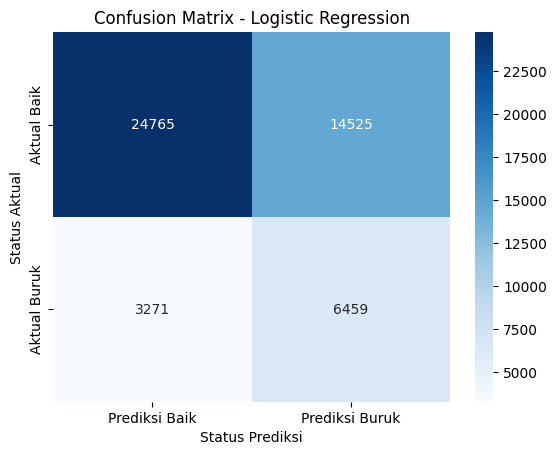

ROC-AUC Score: 0.7001


In [ ]:
# Evaluasi model

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))
report_log = classification_report(y_test, y_pred_log, output_dict=True)

# Confusion matrix
print("Confusion Matrix:")
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediksi Baik', 'Prediksi Buruk'], yticklabels=['Aktual Baik', 'Aktual Buruk'])
plt.ylabel('Status Aktual')
plt.xlabel('Status Prediksi')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# ROC-AUC score
auc_log = roc_auc_score(y_test, y_prob_log)
print(f"ROC-AUC Score: {auc_log:.4f}")

## B. XGBoost

In [ ]:
# Buat dan latih model

# eval_metric='logloss' umum digunakan untuk klasifikasi biner
# random_state=42 -> agar hasilnya bisa direproduksi

# Gunakan di model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:32:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Lakukan prediksi pada data test
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.89     39290
           1       0.48      0.10      0.16      9730

    accuracy                           0.80     49020
   macro avg       0.65      0.54      0.52     49020
weighted avg       0.75      0.80      0.74     49020

Confusion Matrix:


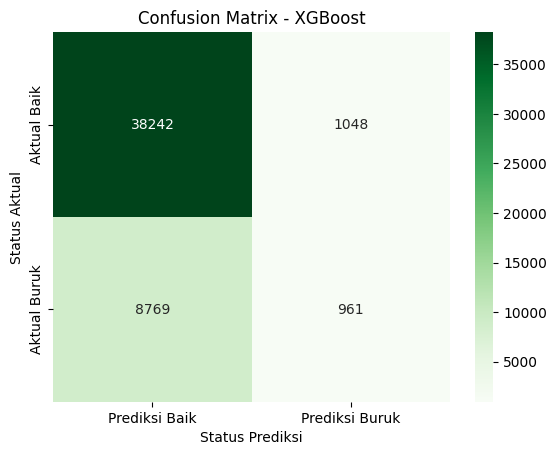

ROC-AUC Score: 0.6987


In [ ]:
# Evaluasi model

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

# Confusion matrix
print("Confusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=['Prediksi Baik', 'Prediksi Buruk'], yticklabels=['Aktual Baik', 'Aktual Buruk'])
plt.ylabel('Status Aktual')
plt.xlabel('Status Prediksi')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# ROC-AUC score
auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f"ROC-AUC Score: {auc_xgb:.4f}")

## C. Random Forest

In [ ]:
# Buat dan latih model

# n_estimators=100 adalah jumlah "pohon" dalam hutan, angka yang umum digunakan
# random_state=42 agar hasilnya bisa direproduksi

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# Lakukan prediksi pada data test
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88     39290
           1       0.44      0.12      0.19      9730

    accuracy                           0.80     49020
   macro avg       0.63      0.54      0.54     49020
weighted avg       0.74      0.80      0.75     49020

Confusion Matrix:


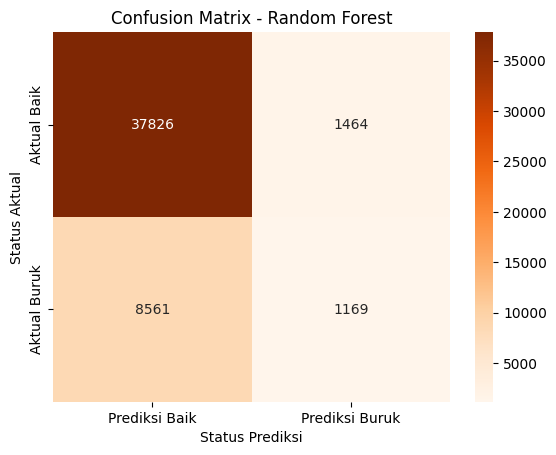

ROC-AUC Score: 0.6918


In [ ]:
# Evaluasi model

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Confusion matrix
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=['Prediksi Baik', 'Prediksi Buruk'], yticklabels=['Aktual Baik', 'Aktual Buruk'])
plt.ylabel('Status Aktual')
plt.xlabel('Status Prediksi')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ROC-AUC score
auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"ROC-AUC Score: {auc_rf:.4f}")

# 4. Model Comparison

In [ ]:
# Siapkan data untuk plot perbandingan
comparison_data = {
    'Metric': ['Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Logistic Regression': [
        report_log['1']['precision'],
        report_log['1']['recall'],
        report_log['1']['f1-score'],
        auc_log
    ],
    'XGBoost': [
        report_xgb['1']['precision'],
        report_xgb['1']['recall'],
        report_xgb['1']['f1-score'],
        auc_xgb
    ],
    'Random Forest': [
        report_rf['1']['precision'],
        report_rf['1']['recall'],
        report_rf['1']['f1-score'],
        auc_rf
    ]
}

df_comparison = pd.DataFrame(comparison_data).melt(id_vars='Metric', var_name='Model', value_name='Score')

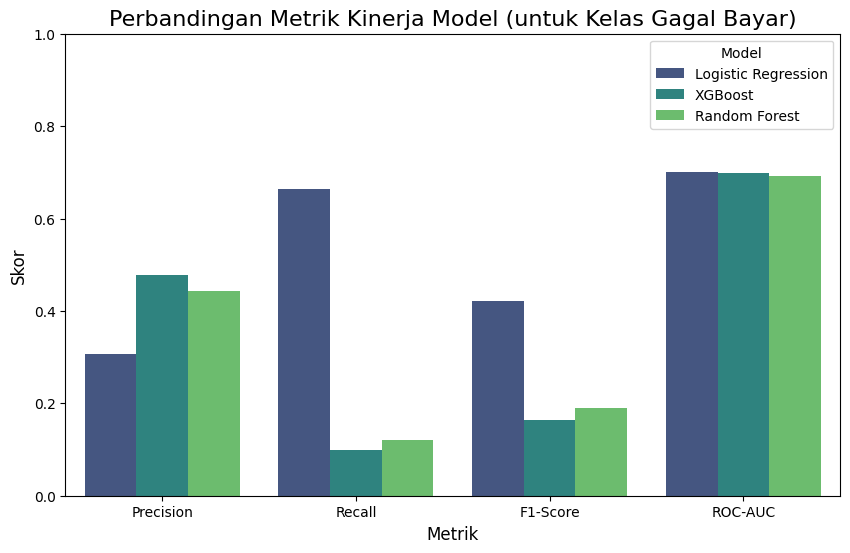

In [ ]:
# Buat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=df_comparison, palette='viridis')
plt.title('Perbandingan Metrik Kinerja Model (untuk Kelas Gagal Bayar)', fontsize=16)
plt.ylabel('Skor', fontsize=12)
plt.xlabel('Metrik', fontsize=12)
plt.ylim(0, 1.0)
plt.legend(title='Model')
plt.show()